# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [22]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [24]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data, test_labels = newsgroups_test.data[num_test//2:], newsgroups_test.target[num_test//2:]
dev_data, dev_labels = newsgroups_test.data[:num_test//2], newsgroups_test.target[:num_test//2]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print( 'test label shape:', test_labels.shape)
print( 'dev label shape:', dev_labels.shape)
print( 'labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [25]:
def P1(num_examples=5):

### STUDENT START ###
    for i in range(num_examples):
        print(newsgroups_train.target_names[train_labels[i]], "\n", train_data[i], "\n")
    
### STUDENT END ###

P1()

comp.graphics 
 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

talk.religion.misc 
 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for centuries. 

sci.space 
 
 >In ar

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [4]:
def P2():

### STUDENT START ###
    CV = CountVectorizer()
    TermDocumentMatrix = CV.fit_transform(train_data)
    
    #2a)
    print("2a) \n")
    print("Size of the vocabulary: ", len(CV.vocabulary_))
    print("Mean number of non-zero features per example: ", TermDocumentMatrix.nnz/TermDocumentMatrix.shape[0])
    print("Percent of entries that are non-zero: ",  100* TermDocumentMatrix.nnz/(TermDocumentMatrix.shape[0]*TermDocumentMatrix.shape[1]), "%")
    print("\n")
    
    #2b)
    FeatureNames = CV.get_feature_names()
    print("2b) \n")
    print("First feature in alphabetical order: ", FeatureNames[0])
    print("Last feature in alphabetical order: ", FeatureNames[-1])
    print("\n")
    
    #2c)
    print("2c) \n")
    vocab = ["atheism", "religion", "graphics", "space"]
    
    CV2 = CountVectorizer(vocabulary = vocab)
    TermDocumentMatrix2 = CV2.fit_transform(train_data)
    
    print("Shape of sparse matrix:", TermDocumentMatrix2.shape)
    print("Mean number of non-zero features per example: ", TermDocumentMatrix2.nnz/TermDocumentMatrix2.shape[0])
    print("\n")
    
    #2d)
    print("2d) \n")
    CV = CountVectorizer(analyzer = 'char_wb', ngram_range =(2,3))
    TermDocumentMatrix = CV.fit_transform(train_data)
    print("Size of the vocabulary with bigrams and trigrams: ", len(CV.vocabulary_), "\n")
    
    #2e)
    print("2e) \n")
    CV = CountVectorizer(min_df = 10)
    TermDocumentMatrix = CV.fit_transform(train_data)
    print("Size of the vocabulary with trimmed bigrams and trigrams: ", len(CV.vocabulary_), "\n")
    
    #2f)
    print("2f) \n")
    CV = CountVectorizer()
    TermDocumentMatrix = CV.fit_transform(dev_data)
    CV2 = CountVectorizer()
    TermDocumentMatrix2 = CV2.fit_transform(train_data)
    
    vocabulary_d = 100*len(set(CV.vocabulary_.keys()) - set(CV2.vocabulary_.keys()))/len(CV.vocabulary_)
    print("% of words in the dev set not in the training set:", vocabulary_d, "%")
    
    
    
### STUDENT END ###

P2()

2a) 

Size of the vocabulary:  26879
Mean number of non-zero features per example:  96.70599803343165
Percent of entries that are non-zero:  0.3597827226959026 %


2b) 

First feature in alphabetical order:  00
Last feature in alphabetical order:  zyxel


2c) 

Shape of sparse matrix: (2034, 4)
Mean number of non-zero features per example:  0.26843657817109146


2d) 

Size of the vocabulary with bigrams and trigrams:  28954 

2e) 

Size of the vocabulary with trimmed bigrams and trigrams:  3064 

2f) 

% of words in the dev set not in the training set: 24.787640034470023 %


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [21]:
def P3():

### STUDENT START ###
    CV = CountVectorizer()
    DTM_train = CV.fit_transform(train_data)
    DTM_test = CV.transform(test_data)
    
    ks = {'n_neighbors': [x for x in range(1,10)]}
    def KNNSearch(ks):
    
        #Input our data into the model and report score and classifier report
        grid_search = GridSearchCV(KNeighborsClassifier(), param_grid = ks, scoring = 'f1_micro')
        grid_search.fit(DTM_train, train_labels)
        return grid_search
    
    knn = KNNSearch(ks)
    print("K-Nearest Neighbors:")
    print(knn.best_params_)
    print("f1 score:", metrics.f1_score(knn.predict(DTM_test), test_labels, average = 'micro'), '\n')
    
    def NBSearch(alphas):
    
        #Input our data into the model and report score and classifier report
        grid_search = GridSearchCV(MultinomialNB(), param_grid = alphas, scoring = 'f1_micro')
        grid_search.fit(DTM_train, train_labels)
        return grid_search

    alphas = {'alpha': [0.00, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    nb = NBSearch(alphas)
    print("Naive Bayes:")
    print(nb.best_params_)
    print("f1 score:", metrics.f1_score(nb.predict(DTM_test), test_labels, average = 'micro'), '\n')
    
    def LRSearch(Cs):
        grid_search = GridSearchCV(LogisticRegression(penalty='l2', multi_class='ovr'), param_grid = Cs, scoring = 'f1_micro')
        grid_search.fit(DTM_train, train_labels)
        return grid_search
    
    Cs = {'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100]}
    lr = LRSearch(Cs)
    print("Logistic Regression: ")
    print(lr.best_params_)
    print("f1 score:", metrics.f1_score(lr.predict(DTM_test), test_labels, average = 'micro'))
    
    scores = np.zeros((4, len(Cs['C'])))
    for c in range(len(Cs['C'])):
        lr = LogisticRegression(penalty='l2', multi_class='ovr', C = Cs['C'][c])
        lr.fit(DTM_train, train_labels)
        for i in range(4):
            scores[i][c] = sum(np.square(lr.coef_[i]))
            print("C =", Cs['C'][c], ", Class:", i, ", Sum of Squares:", scores[i][c])
      

### STUDENT END ###

P3()

K-Nearest Neighbors:
{'n_neighbors': 9}
f1 score: 0.404726735598 



C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Kippy\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -


Naive Bayes:
{'alpha': 0.01}
f1 score: 0.781388478582 

Logistic Regression: 
{'C': 0.5}
f1 score: 0.753323485968
C = 0.0001 , Class: 0 , Sum of Squares: 0.00770174944675
C = 0.0001 , Class: 1 , Sum of Squares: 0.0119412003106
C = 0.0001 , Class: 2 , Sum of Squares: 0.00943507686564
C = 0.0001 , Class: 3 , Sum of Squares: 0.00910283529383
C = 0.001 , Class: 0 , Sum of Squares: 0.165093451668
C = 0.001 , Class: 1 , Sum of Squares: 0.200952746906
C = 0.001 , Class: 2 , Sum of Squares: 0.180670937544
C = 0.001 , Class: 3 , Sum of Squares: 0.187242784378
C = 0.01 , Class: 0 , Sum of Squares: 2.54150029997
C = 0.01 , Class: 1 , Sum of Squares: 2.93970936836
C = 0.01 , Class: 2 , Sum of Squares: 2.86246881986
C = 0.01 , Class: 3 , Sum of Squares: 2.2500287496
C = 0.1 , Class: 0 , Sum of Squares: 27.1324019324
C = 0.1 , Class: 1 , Sum of Squares: 24.6590494531
C = 0.1 , Class: 2 , Sum of Squares: 27.4585773635
C = 0.1 , Class: 3 , Sum of Squares: 23.0245392328
C = 0.5 , Class: 0 , Sum of Squa

ANSWER:
a) Nearest neighbors works horribly for this set of data because the emails all have very different features. So in general a spacial representation of the emails will generally look like noise. Obviously it's not quite true since the accuracy is higher than 25%. But in general, many emails in a category will look very different from one another, with maybe a few key words in common (as we will see in the table of features later).
b) Logistic Regression can have issues with large amounts of features. With our thousands of features here, it is likely overfitting the data. Naive Bayes works well with small amounts of data since it is modeled using a joint probability distribution.
c) As C increases, the sum of square increases also. This is because with strong regularization most of the features coefficients are going to be close to zero. Thus when C increases and regularization strength decreases all the weights increase (in absolute value).


(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

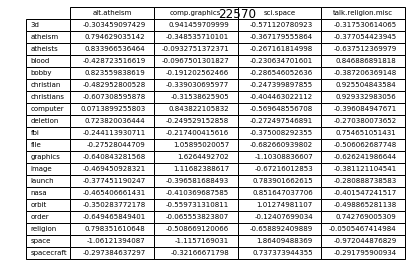

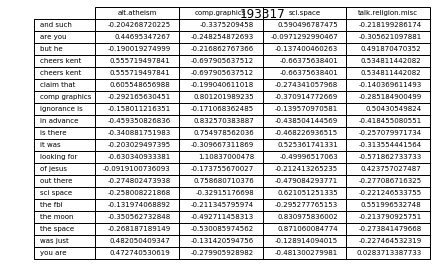

In [28]:
def P4():

### STUDENT START ###
    for i in (0,1):
        if i == 0:
            r = (1,1)
        else:
            r = (2,2)
        CV = CountVectorizer(analyzer = 'word', ngram_range = r )
        DTM_train = CV.fit_transform(train_data)
        lr = LogisticRegression(penalty='l2', multi_class='ovr', C = 0.5, max_iter = 150)
        lr.fit(DTM_train, train_labels)

        #Finds the top features (as a tuple)
        topfeatures = [0]*4
        for i in range(4):
            topfeatures[i] = sorted(enumerate(lr.coef_[i]), key=lambda tup: tup[1], reverse = True)[0:5]

        #Extracts the indices of the top features
        feature_index = []
        for lst in topfeatures:
            for j in lst:
                feature_index.append(j[0])
        feature_index.sort()

        #Sets up the data for the table
        feature_names = []
        table_text = []
        for i in feature_index:
            feature_names.append(CV.get_feature_names()[i])
            table_text.append([lr.coef_[j][i] for j in range(4)])

        #Table
        fig, ax = plt.subplots()
        plt.title(i)
        ax.axis('tight')
        ax.axis('off')
        ax.table(cellText=table_text, rowLabels=feature_names, colLabels=newsgroups_train.target_names, loc='center')
### STUDENT END ###

P4()

ANSWER:
For atheism: Bobby, deletion. Perhaps Bobby is to do with Bobby Henderson who came up with the idea of the flying spaghetti monster. I'm not sure about deletion, I'd expect that to be in graphics.

Graphics: These seem reasonable.

Space: These seems reasonable.

Religion: Blood, FBI, order. Blood makes sense because Christian and Christians are high and it's very relevant to the associated theology. Order perhaps references Franciscan or other orders within Christianity. It's still suprising to me that  it shows up over something like pastor or something else. As for FBI? Who knows...

For Bigrams, the models cheats a bit and appends "the" to many keywords. Cheers Kent shows up, which is confusing. In general, the bigrams are much noisier and have weaker weights. Interestingly, it picks up a lot of extremely common phrases such as "you are", "it was", "out there".

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [29]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):

### STUDENT START ###
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]','', s)
    s = re.sub(r'\s{2,}', ' ', s)
    s = re.sub(r'(\w{9})\w*\s', r'\1 ' , s)
    s = re.sub(r'\d+', 'NUM', s)
    
    return s
### STUDENT END ###


def P5():

### STUDENT START ###
        
    CV = CountVectorizer(preprocessor = better_preprocessor)
    DTM_train = CV.fit_transform(train_data)
    DTM_test = CV.transform(test_data)
    lr = LogisticRegression(penalty='l2', multi_class='ovr', C = 0.5, max_iter = 150)
    lr.fit(DTM_train, train_labels)
    print("Size of the pre-processed vocabulary: ", len(CV.vocabulary_))
    print("f1 score:", metrics.f1_score(lr.predict(DTM_test), test_labels, average = 'micro'))
    
    
    CV2 = CountVectorizer(preprocessor = empty_preprocessor)
    DTM_train = CV2.fit_transform(train_data)
    DTM_test = CV2.transform(test_data)
    lr = LogisticRegression(penalty='l2', multi_class='ovr', C = 0.5, max_iter = 150)
    lr.fit(DTM_train, train_labels)
    print("Size of the unprocessed vocabulary: ", len(CV2.vocabulary_))
    print("f1 score:", metrics.f1_score(lr.predict(DTM_test), test_labels, average = 'micro'))
### STUDENT END ###

P5()

Size of the pre-processed vocabulary:  25299
f1 score: 0.751846381093
Size of the unprocessed vocabulary:  33291
f1 score: 0.713441654357


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Number of non-zero weights with L1 penalty: 1735
Number of non-zero weights with L2 penalty: 44623


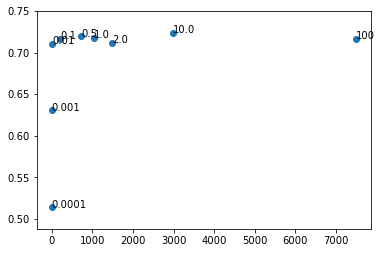

In [41]:
def P6():

    # Keep this random seed here to make comparison easier.
    np.random.seed(0)
    
    ### STUDENT START ###
    Cs = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0, 100]
    scores = [0]*len(Cs)
    vocab_size = [0]*len(Cs)
    
    CV = CountVectorizer()
    DTM_train = CV.fit_transform(train_data)
    DTM_test = CV.transform(test_data)
    
    for i in range(len(Cs)):
    
        lr1 = LogisticRegression(penalty = 'l1', C = Cs[i], tol = .01)
        lr1.fit(DTM_train, train_labels)
        
        if Cs[i] == 1:
            print('Number of non-zero weights with L1 penalty:', np.count_nonzero(np.round(lr1.coef_, 2)))
            lr2 = LogisticRegression(penalty = 'l2')
            lr2.fit(DTM_train, train_labels)
            #there are tons of rounding errors here so we need to round to the nearest .01 (our tolerance) to make any of the weights non-zero
            print('Number of non-zero weights with L2 penalty:', np.count_nonzero(np.round(lr2.coef_, 2)))

        
        #get nonzero features
        features = set()
        for category in range(4):
            for feature in range(len(lr1.coef_[0])):
                if round(lr1.coef_[category][feature],2) != 0:
                    features.add(feature)

        #convert the feature indices into a vocabulary
        vocab = []
        #Interestingly, there's a huge performance increase if you pull the feature names outside the list.
        feature_names = CV.get_feature_names()
        for j in features:
            vocab.append(feature_names[j])
            
        vocab_size[i] = len(vocab)

        CV2 = CountVectorizer(vocabulary = vocab)
        lr3 = LogisticRegression(penalty = 'l2', C = Cs[i], tol = 0.1)
        lr3.fit(DTM_train, train_labels)
        scores[i] = lr3.score(DTM_test, test_labels)
        
    
    fig, ax = plt.subplots()
    ax.scatter(vocab_size, scores)

    for i, txt in enumerate(Cs):
        ax.annotate(txt, (vocab_size[i],scores[i]))
        
    ### STUDENT END ###
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [49]:
def P7():

### STUDENT START ###
    TV = TfidfVectorizer()
    DTM_train = TV.fit_transform(train_data)
    DTM_dev = TV.transform(dev_data)
    
    lr = LogisticRegression(C=100)
    lr.fit(DTM_train, train_labels)
    
    prob = lr.predict_proba(DTM_dev)
    R = [0]*len(dev_data)
    for i in range(len(dev_data)):
        R[i] = max(prob[i])/prob[i][dev_labels[i]]
        
    R = sorted(enumerate(R), key=lambda tup: tup[1], reverse = True)[0:3]
    
    for i in range(3):
        print(i + 1, ":", "Score:", R[i][1], prob[R[i][0]])
        print("Actual Label:", newsgroups_train.target_names[dev_labels[R[i][0]]])
        print("Predicted Label:", newsgroups_train.target_names[lr.predict(DTM_dev[R[i][0]])[0]])
        print(dev_data[R[i][0]][0:500], '\n')
    
    
    

## STUDENT END ###

P7()

1 : Score: 929.358094789 [ 0.00196563  0.99371994  0.00324517  0.00106925]
Actual Label: talk.religion.misc
Predicted Label: comp.graphics
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, an 

2 : Score: 325.004160792 [ 0.00291047  0.97974632  0.01432865  0.00301457]
Actual Label: talk.religion.misc
Predicted Label: comp.graphics
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

3 : Score: 287.179191162 [ 0.0024217   0.0200709   0.28204504  0.69546236]
Act

ANSWER: TfidVectorizer is different from CountVectorizer in that it weights words not just on how frequently they occur in classes. Words that appear in documents very commonly such as "the" will have very little weight since all emails tend to have this weight. 

The issue with these classifications is that the weight is having issues with recognizing which word is more important: mormon or ftp. It's clearly using the ftp label to assign these to comp.graphics despite the email being very obvious to a human that it is about Book of Mormon. That said both of these words are relatively rare in the corpus so they are both heavily adjusted. I think ngrams may actually help in this case, where we look at more words. Then ftp wouldn't be weighted alone and things like "Book of Mormon" may actually help.

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.